In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
from scipy import constants
import os
import glob
from matplotlib import rc

In [2]:
from InfluxData import InfluxData
client = InfluxData()
client.set_client('155.230.28.170',8086,'sslab','1231',database='kmaeq')
client.get_device()
rs = client.query("select * from acc_data where dev_id='0025' and time >= '2019-04-03T07:00:00Z' AND time <= '2019-04-03T08:00:00Z'")
data = client.resultSetToDF(rs)['acc_data']
data.describe()

,x,y,z
count,360030.000000,360030.000000,360030.000000
mean,0.000957,-0.002275,0.014230
std,0.154592,0.151813,0.095842
min,-0.955709,-0.961983,-0.043799
25%,-0.010372,-0.011625,-0.014299
50%,-0.000072,-0.000392,-0.013251
75%,0.010756,0.009652,-0.011401
max,0.985211,0.972929,0.980763


In [8]:
rs = client.query("select * from acc_data where dev_id='0024' and time >= '2019-04-03T07:00:00Z' AND time <= '2019-04-03T08:00:00Z'")
good_data = client.resultSetToDF(rs)

In [9]:
good_data = good_data['acc_data']
good_data.describe()

,x,y,z
count,360032.000000,360032.000000,360032.000000
mean,0.000204,-0.000739,-0.015105
std,0.045727,0.043453,0.029098
min,-0.960803,-0.896508,-0.049258
25%,-0.000352,-0.001248,-0.018662
50%,-0.000065,-0.000181,-0.017436
75%,0.000286,0.000845,-0.015978
max,0.974127,0.935829,0.824755


In [10]:
x = data['x']*constants.g # gravity acceleration
y = data['y']*constants.g
z = data['z']*constants.g
g_x = good_data['x']*constants.g
g_y = good_data['y']*constants.g
g_z = good_data['z']*constants.g

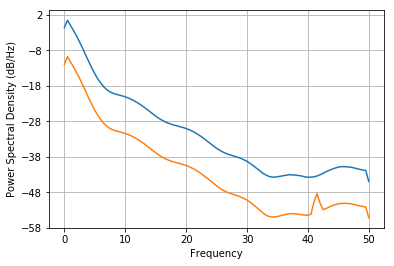

In [11]:
offset_x = x - np.mean(x)
Pxx, freqs = plt.psd(offset_x,NFFT=200,Fs=100)

offset_g_x = g_x - np.mean(g_x)
Pxx_g, freqs_g = plt.psd(offset_g_x,NFFT=200,Fs=100)

In [7]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Pxx,Pxx_g)
print("0025 -> PSD mean: ",np.mean(Pxx)," ,MSE: ",mse)
print("0015 -> PSD mean: ",np.mean(Pxx_g))


0025 -> PSD mean:  0.04506934240933889  ,MSE:  0.030223871462828192
0015 -> PSD mean:  2.4709067105587803e-06


In [12]:
rs = client.query("select * from acc_data where dev_id='0253' and time >= '2019-04-03T07:00:00Z' AND time <= '2019-04-03T08:00:00Z'")
some_data = client.resultSetToDF(rs)
some_data['acc_data'].describe()

cannot query to influxDB
failed qry contents:  select * from acc_data where dev_id='0253' and time >= '2019-04-03T07:00:00Z' AND time <= '2019-04-03T08:00:00Z'


KeyboardInterrupt: 